# **Neural Network**

### MACHINE INTELLIGENCE IN ARCHITECTURE SYLLABUS

#### LECTURES/WORKSHOPS
*Monday 12th July - Friday 23rd July 2021 08:00 to 13:00 CST*

#### TEACHING STAFF
*Dr. Jose Luis García del Castillo y López\
jgarciadelcasti@gsd.harvard.edu \
Lecturer in Architectural Technology\
Lecturer in Architecture\
Harvard GSD*

*Runjia Tian\
runjia_tian@gsd.harvard.edu\
Machine Learning Researcher\
Harvard GSD*

In [13]:
import torch

print("PyTorch", torch.__version__)

PyTorch 1.8.0


In [14]:
torch.cuda.is_available()

True

#### Create your own Photoshop

In [34]:
from IPython.display import IFrame
from torch import nn, tensor

Shape of original imge(1050, 700, 3), shape of cropped image(70, 50, 3)


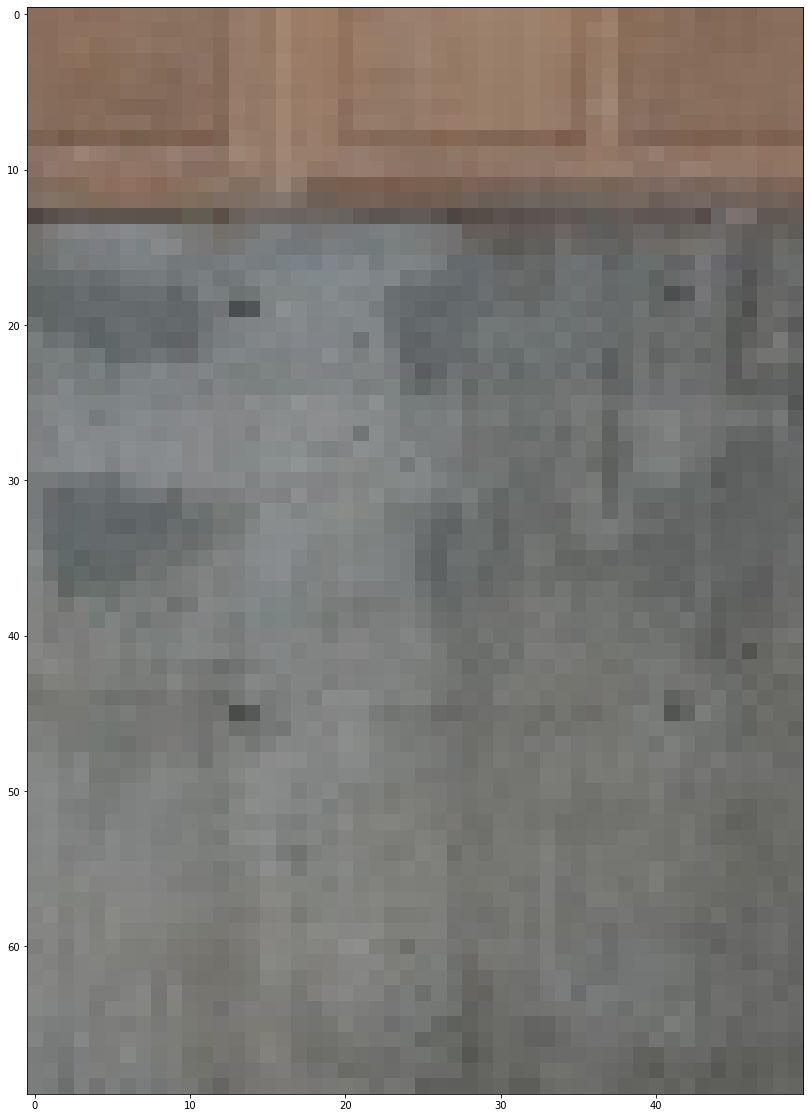

In [69]:
img = plt.imread('asset/exter_library.jpg')

partial = (img[200:270,300:350,:])

print(f"Shape of original imge{img.shape}, shape of cropped image{partial.shape}")
partial.shape

plt.figure(figsize = (20,20))
plt.imshow(partial);

#### Convolution

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


array([[[11.125,  2.   , 24.125],
        [30.125,  2.   , 24.125],
        [20.5  , 25.125, 16.5  ],
        ...,
        [24.125, 24.125,  9.125],
        [ 8.125,  0.   , 16.5  ],
        [16.5  , 16.5  ,  9.125]],

       [[20.5  , 11.125,  0.   ],
        [30.125,  2.   , 24.125],
        [11.125,  0.   ,  2.   ],
        ...,
        [ 8.125,  0.   , 16.5  ],
        [25.125, 24.125, 16.5  ],
        [16.5  , 16.5  ,  9.125]],

       [[28.5  , 30.125, 16.5  ],
        [18.125, 20.5  ,  8.125],
        [20.5  ,  8.125,  9.125],
        ...,
        [ 8.125,  0.   , 16.5  ],
        [16.5  , 16.5  ,  9.125],
        [16.5  , 16.5  ,  9.125]],

       ...,

       [[ 0.   , 12.5  , 30.125],
        [29.125,  6.125, 28.5  ],
        [ 7.125,  3.125, 18.   ],
        ...,
        [ 0.   , 12.5  , 30.125],
        [18.   , 18.   , 11.125],
        [ 5.125, 15.125, 20.5  ]],

       [[ 0.   , 12.5  , 25.125],
        [18.   ,  4.5  , 18.125],
        [ 7.125,  0.5  , 18.   ],
        .

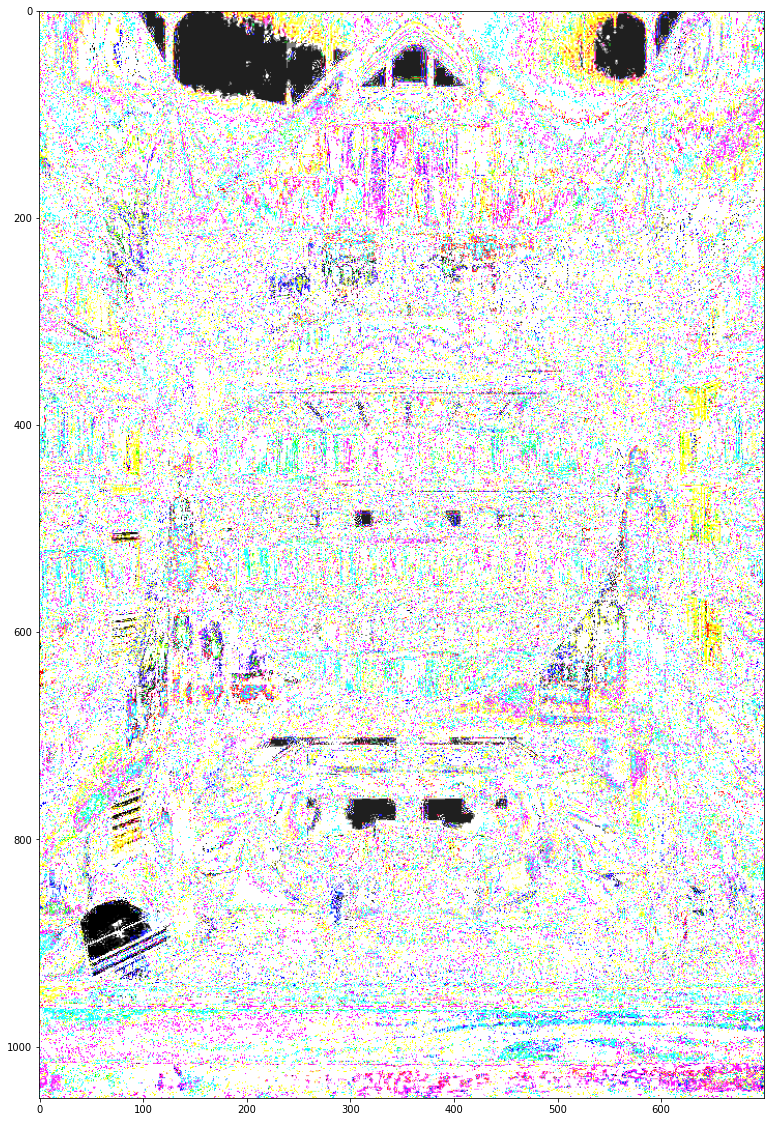

In [80]:
manipulated = (img)*img/8

plt.figure(figsize = (20,20))
plt.imshow(manipulated);
manipulated

get the rgb channels

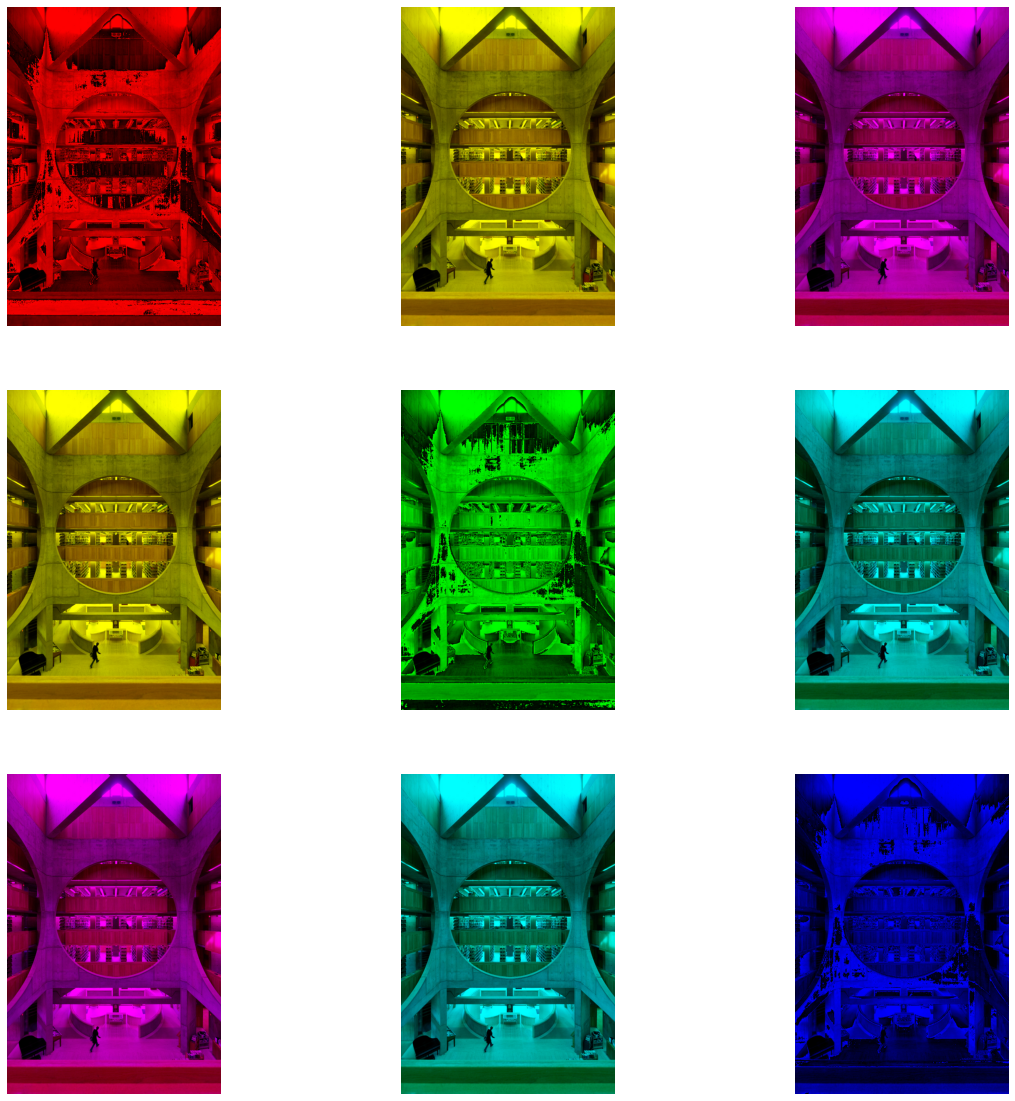

In [112]:
fig, axs = plt.subplots(3, 3, figsize = (20,20))

for i in range(0,3):
    channel = np.zeros(img.shape, dtype='uint8')
    channel[:,:,i] = img[:,:,i]
    for j in range(0,3):
        empty = np.zeros(img.shape, dtype='uint8')
        empty[:,:,j] = img[:,:,j]
        axs[i][j].axis('off')
        axs[i][j].imshow(channel+empty);
        channel_r.shape

In [29]:
IFrame("https://giphy.com/embed/i4NjAwytgIRDW", 300,300)

#### Build A CPPN

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
model = nn.Sequential(
    nn.Linear(5,32),
    nn.Tanh(),
    nn.Linear(32,32),
    nn.Tanh(),
    nn.Linear(32,32),
    nn.Tanh(),
    nn.Linear(32,1),
    nn.Sigmoid(),
)

w = torch.empty(5, requires_grad=False)
nn.init.normal_(w)
w

model(w)

tensor([0.4779], grad_fn=<SigmoidBackward>)

In [18]:
def pixelGrid(resolution=64):
    x = np.linspace(-1,1, resolution)
    X,Y = np.meshgrid(x,x)
    return np.vstack([X.flatten(),Y.flatten()]).T

# example
print(pixelGrid(3))

def generateIm(model,z=[0,0],resolution=64, scale=1.0):
    model.eval()
    pixels = pixelGrid(resolution)*scale
    input = tensor(np.hstack([pixels,np.linalg.norm(pixels,axis=1).reshape(-1,1),np.repeat([z],resolution**2, axis=0)*scale]))
    print(input)
    return model(input.float()).reshape(resolution,resolution).detach().numpy()

[[-1. -1.]
 [ 0. -1.]
 [ 1. -1.]
 [-1.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [-1.  1.]
 [ 0.  1.]
 [ 1.  1.]]


tensor([[-200000.4200, -200000.4200,  282843.3064, -130000.2730,  112000.2352],
        [-197990.3655, -200000.4200,  281425.5725, -130000.2730,  112000.2352],
        [-195980.3111, -200000.4200,  280015.0895, -130000.2730,  112000.2352],
        ...,
        [ 195980.3111,  200000.4200,  280015.0895, -130000.2730,  112000.2352],
        [ 197990.3655,  200000.4200,  281425.5725, -130000.2730,  112000.2352],
        [ 200000.4200,  200000.4200,  282843.3064, -130000.2730,  112000.2352]],
       dtype=torch.float64)


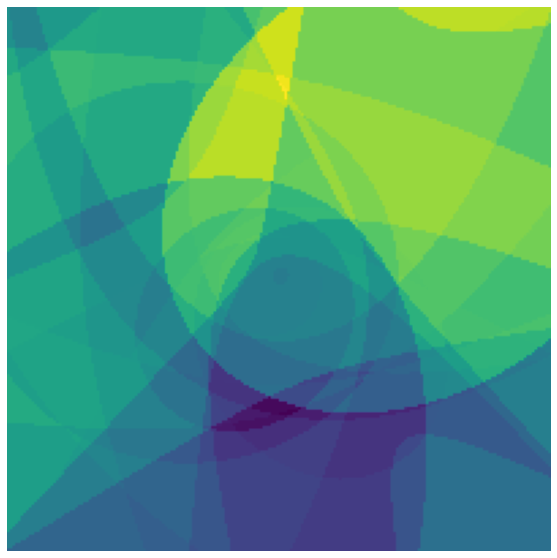

In [28]:
%matplotlib inline

#Latent Vector { run: "auto" }
z1 = -0.65
z2 = 0.56
scale = 200000.42


im = generateIm(model,z=[z1,z2],scale=scale,resolution=200)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(im)


##### Style Transfer

In [113]:
from __future__ import print_function

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as transforms
import torchvision.models as models

import copy

In [114]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

loader = transforms.Compose([
    transforms.Resize(imsize),  # scale imported image
    transforms.ToTensor()])  # transform it into a torch tensor


def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)


style_img = image_loader("asset/exter_library.jpg")
content_img = image_loader("./data/images/neural-style/dancing.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

##### StyleGAN

##### Pix2Pix